# Proyecto # 1 - 1a Parte
## Product Development - Ing. Preng Biba
### Hugo Brian Bay Rojas - Carnet 20002544

## 2. Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import joblib

In [3]:
data = pd.read_csv('Engineering_graduate_salary.csv')
print(data.shape)

(2998, 34)


In [4]:
data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
#separamos data para entrenamiento y prueba,
X_train, X_test, y_train, y_test = train_test_split(
                        data.drop(['ID', 'CollegeCityID', 'Salary'], axis=1),
                        data['Salary'],
                        test_size=0.3,
                        random_state=2021)

In [6]:
X_train.shape, X_test.shape

((2098, 31), (900, 31))

### 2.1. Transformación del Target a Box Cox

In [7]:
y_train, param_y = stats.boxcox(y_train)
y_train = pd.Series(y_train).rename('Salary')
y_test = stats.boxcox(y_test, lmbda = param_y)
y_test = pd.Series(y_test).rename('Salary')

In [8]:
joblib.dump(param_y, 'preprocess_data/boxcox_y.joblib')

['preprocess_data/boxcox_y.joblib']

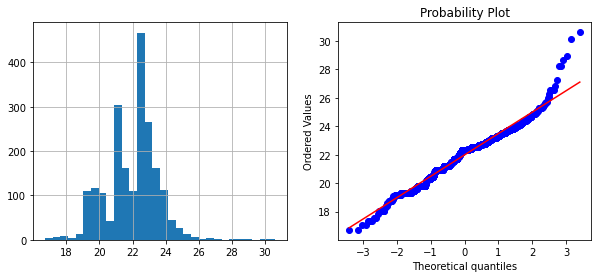

In [9]:
plt.figure(figsize=(10,4))
    
plt.subplot(1, 2, 1)
y_train.hist(bins=30)
    
plt.subplot(1, 2, 2)
stats.probplot(y_train, dist="norm", plot=plt)
    
plt.show()

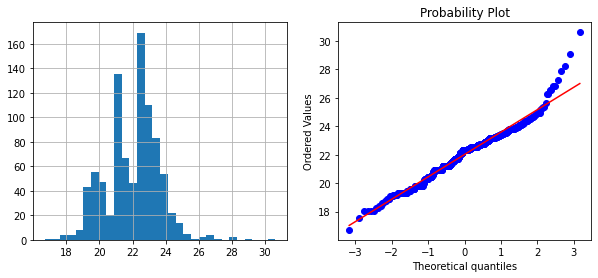

In [10]:
plt.figure(figsize=(10,4))
    
plt.subplot(1, 2, 1)
y_test.hist(bins=30)
    
plt.subplot(1, 2, 2)
stats.probplot(y_test, dist="norm", plot=plt)
    
plt.show()

### 2.2. Variables temporales

In [11]:
temp_vars = ['DOB', '12graduation', 'GraduationYear']

#### 2.2.1. Variables temporales con valor cero

In [12]:
for var in temp_vars:
    mode = X_train[var].mode()[0]
    
    X_train[var] = np.where(X_train[var] == 0, mode, X_train[var])
    X_test[var] = np.where(X_test[var] == 0, mode, X_test[var])
    
    print(var, "-------", mode)

DOB ------- 1990-10-07
12graduation ------- 2009
GraduationYear ------- 2013


#### 2.2.2. Cálculo de edades de graduación de Highscool y Bachelor degree

In [13]:
# Extracción del año de la variable 'DOB'
X_train['YOB'] = X_train['DOB'].str[0:4].astype('int')
X_test['YOB'] = X_test['DOB'].str[0:4].astype('int')

In [14]:
def elapsed_time(df, var, ref):
    df[var] = df[var] - df[ref]
    return df

In [15]:
year_vars = ['YOB', '12graduation', 'GraduationYear']

In [16]:
ref = 'YOB'

for var in year_vars:
    if(var is not ref):
        X_train = elapsed_time(X_train, var, ref)
        X_test = elapsed_time(X_test, var, ref)

In [17]:
#Eliminamos columnas DOB y YOB debido a que ya no son necesarias
X_train.drop(['DOB', 'YOB'], axis=1, inplace=True)
X_test.drop(['DOB', 'YOB'], axis=1, inplace=True)

### 2.3. Transformación de variables numéricas

In [18]:
yj_vars = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

#### 2.3.1. Transformación Yeo Johnson

In [19]:
for var in yj_vars:
    X_train[var], param = stats.yeojohnson(X_train[var])
    X_test[var] = stats.yeojohnson(X_test[var], lmbda=param)
    print(var, '-------', param)

10percentage ------- 2.8035518695461774
12percentage ------- 0.955746339365293
collegeGPA ------- 1.9937538163992128
English ------- 0.5709625906094499
Logical ------- 1.3943447502742088
Quant ------- 1.0485568377623353
Domain ------- 2.87012640329209
conscientiousness ------- 1.300754246720724
agreeableness ------- 1.5226864071507848
extraversion ------- 1.2661680353428952
nueroticism ------- 0.8866729893603521
openess_to_experience ------- 1.5233910475265733


#### 2.3.2. Binarización de variables con sesgo fuerte

In [20]:
sesgadas = ['ElectronicsAndSemicon', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg']

In [21]:
for var in sesgadas:
    X_train[var] = np.where(X_train[var] == -1, -1, 0)
    X_test[var] = np.where(X_test[var] == -1, -1, 0)

### 2.4. Codificación de variables categóricas

In [22]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars = cat_vars + ['CollegeID']
cat_vars = [var for var in cat_vars if var not in temp_vars]
len(cat_vars)

7

In [23]:
rare_lab_vars = ['10board', '12board', 'Specialization', 'CollegeState', 'CollegeID']
no_rare_lab_vars = ['Gender', 'Degree']

In [24]:
#funcion para encontar etiquetas raras
def find_rare_labels_freq(df, var, rare_perc):
    temp = df.groupby(var)[var].count()/len(df)
    return temp[temp > rare_perc].index

In [25]:
for var in rare_lab_vars:
    freqValue = find_rare_labels_freq(X_train, var, 0.01)
    
    #print(var, '--------', freqValue)
    
    X_train[var] = np.where(X_train[var].isin(freqValue), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(freqValue), X_test[var], 'Rare')

In [26]:
def replace_category_vals(train, test, y_train, var, target):
    
    temp = pd.concat([train, y_train], axis=1) 
    order_labels = temp.groupby([var])[target].mean().sort_values().index
    
    ordinal_values = {k: i for i, k in enumerate(order_labels, 0)}
    
    print(var, ordinal_values)
    
    train[var] = train[var].map(ordinal_values)
    test[var] = test[var].map(ordinal_values)

In [27]:
for var in cat_vars:
    replace_category_vals(X_train, X_test, y_train, var, 'Salary')

Gender {'f': 0, 'm': 1}
10board {'matriculation': 0, 'up board': 1, 'ssc': 2, '0': 3, 'Rare': 4, 'state board': 5, 'cbse': 6, 'icse': 7}
12board {'up board': 0, '0': 1, 'Rare': 2, 'state board': 3, 'cbse': 4, 'icse': 5, 'isc': 6}
Degree {'MCA': 0, 'B.Tech/B.E.': 1, 'M.Tech./M.E.': 2, 'M.Sc. (Tech.)': 3}
Specialization {'computer application': 0, 'computer engineering': 1, 'Rare': 2, 'mechanical engineering': 3, 'computer science & engineering': 4, 'electronics and communication engineering': 5, 'information technology': 6, 'electrical engineering': 7, 'electronics & telecommunications': 8, 'electronics and electrical engineering': 9}
CollegeState {'Tamil Nadu': 0, 'Madhya Pradesh': 1, 'Maharashtra': 2, 'West Bengal': 3, 'Karnataka': 4, 'Uttar Pradesh': 5, 'Telangana': 6, 'Rajasthan': 7, 'Delhi': 8, 'Andhra Pradesh': 9, 'Punjab': 10, 'Haryana': 11, 'Uttarakhand': 12, 'Rare': 13, 'Orissa': 14}
CollegeID {'272': 0, 'Rare': 1}


In [28]:
def analyse_other_cats(train, y_train, var):
    temp = pd.concat([train, y_train], axis=1)

    sns.catplot(x=var, y='Salary', data=temp, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='Salary', data=temp, jitter=0.1, alpha=0.3, color='k')
    plt.show()

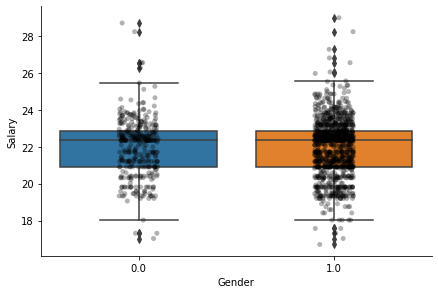

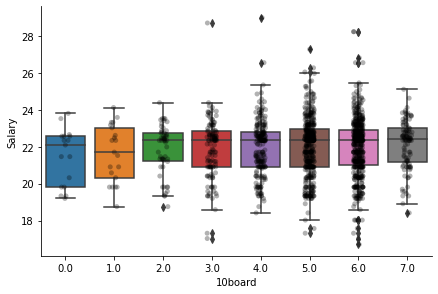

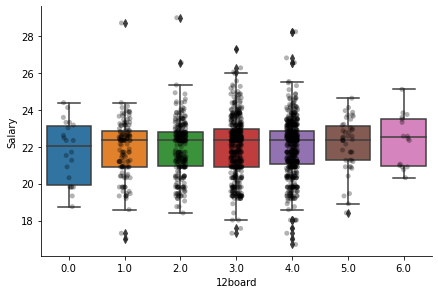

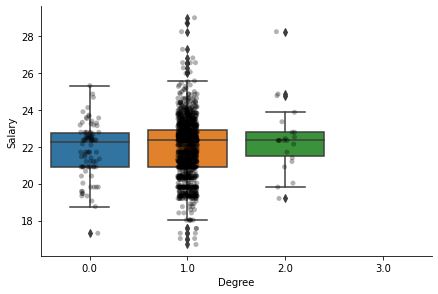

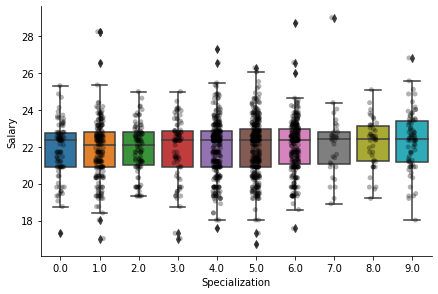

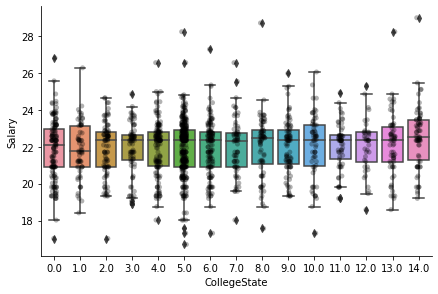

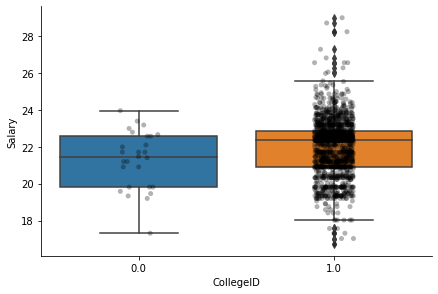

In [29]:
for var in cat_vars:
    analyse_other_cats(X_train, y_train, var)

### 2.5. Feature Scaling

In [30]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)


X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [31]:
X_train.head()

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.0,0.234155,0.714286,0.333333,0.458371,0.500000,1.0,1.0,0.333333,0.111111,...,0.569832,0.0,0.0,0.0,0.0,0.926364,0.294952,0.371902,0.171028,0.479338
1,1.0,0.443660,0.857143,0.583333,0.478988,0.666667,1.0,1.0,0.333333,0.444444,...,0.000000,0.0,0.0,0.0,0.0,0.820284,0.762350,0.598443,0.358717,0.677631
2,1.0,0.812883,0.714286,0.416667,0.614334,0.500000,1.0,1.0,0.333333,0.333333,...,0.000000,1.0,0.0,0.0,0.0,0.353043,0.445682,0.710622,0.733449,0.579626
3,1.0,0.312822,0.857143,0.333333,0.646791,0.666667,1.0,1.0,0.000000,0.000000,...,0.956704,0.0,0.0,0.0,0.0,0.193803,0.762350,0.598443,0.733449,0.641945
4,1.0,0.578905,0.857143,0.416667,0.485857,0.666667,1.0,1.0,0.333333,0.111111,...,0.000000,0.0,0.0,0.0,0.0,0.859074,0.743478,0.562093,0.291145,0.579388


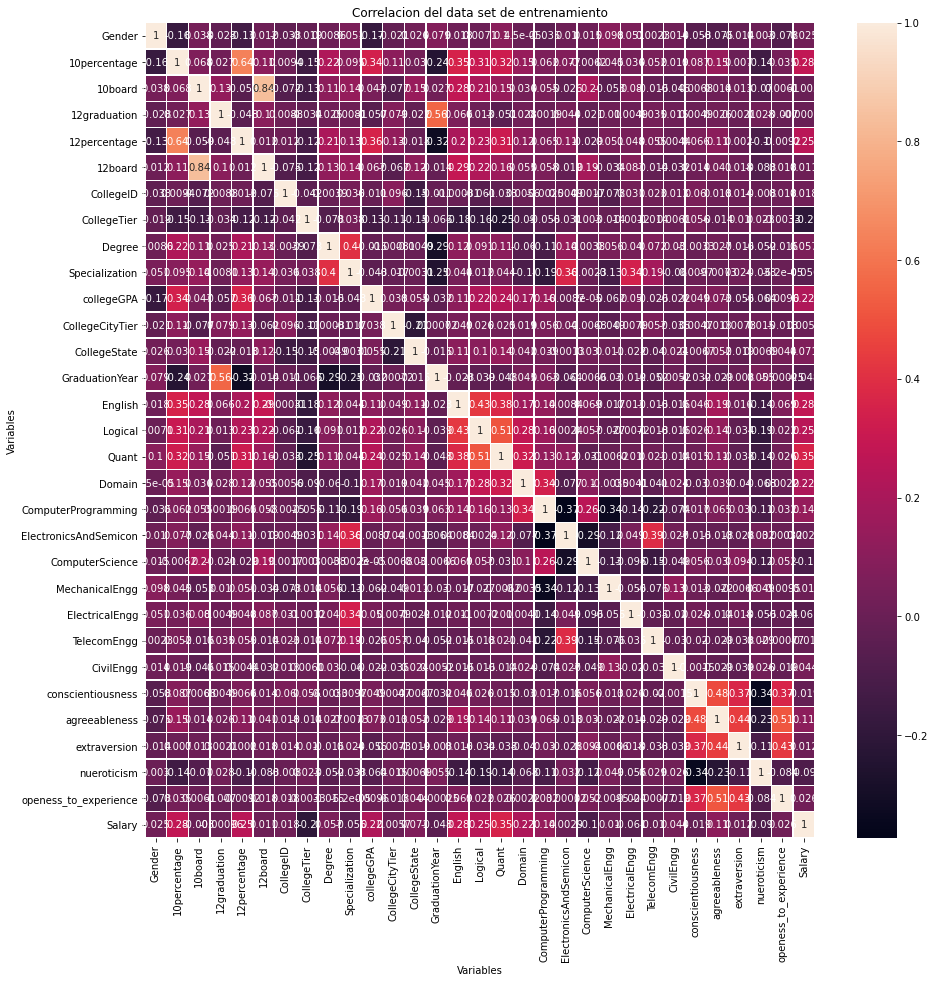

In [32]:
concat_temp = pd.concat([X_train, y_train], axis=1)
correlacion_mat = concat_temp.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlacion_mat, annot = True, linewidths = .5, ax = ax)
plt.title("Correlacion del data set de entrenamiento")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [33]:
#Guardamos dataset con data preparada para entrenamiento.

X_train.to_csv('preprocess_data/prep_Xtrain.csv', index=False)
X_test.to_csv('preprocess_data/prep_Xtest.csv', index=False)

y_train.to_csv('preprocess_data/prep_ytrain.csv', index=False)
y_test.to_csv('preprocess_data/prep_ytest.csv', index=False)

In [34]:
joblib.dump(scaler, 'preprocess_data/minmax_scaler.joblib')

['preprocess_data/minmax_scaler.joblib']

In [37]:
X_train['MechanicalEngg'].value_counts()

0.0    1965
1.0     133
Name: MechanicalEngg, dtype: int64